In [191]:
# Important Working Procedure for this script
#  Step 1: Define the path for the training data set
#  Step 2: Define the weights of samples (uniform or distance)
#  Step 3: Define the path for storing gait prediction result of the test set

print("!!Define the Varaibles in the section below!!")

!!Define the Varaibles in the section below!!


In [192]:
# Set up the variables before running the rest of the script!
# Set up Important Variables

#MiniForce 0 Degrees
#databasePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/1_MiniForces/0_Degrees/database-20200221T133542.csv"

#MiniBodyVib 0 Degrees
#databasePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/0_Degrees/database-20200221T134502.csv"

#MiniBodyVib 20 Degrees
databasePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/20_Degrees/database-20200221T133951.csv"

weight_list = ['distance'] #another option uniform/distance

# Define number of neighbors to be considered
n_neighbors = 2

# For test set
#Mini Force 0 Degrees
#TestSetSamplePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/1_MiniForces/0_Degrees/InitialGuess/TestSet_TaskSamples-20200223T173907.csv"
#PredictionResultPath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/1_MiniForces/0_Degrees/InitialGuess/Prediction_Result.csv"

#Mini Vib 0 Degrees
#TestSetSamplePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/0_Degrees/InitialGuess/TestSet_TaskSamples-20200223T191222.csv"
#PredictionResultPath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/0_Degrees/InitialGuess/Prediction_Result.csv"

#MiniBodyVib 20 Degrees
TestSetSamplePath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/20_Degrees/InitialGuess/TestSet_TaskSamples-20200223T213225.csv"
PredictionResultPath = "/home/jiayu/Dropbox/2D_ANYmal_Gait_Discovery/10_Percent_Phaselb/BoundingBoxWidth_0.5_Height_0.2/TangentialDesiredSpeed/5_SmoothMotion/20_Degrees/InitialGuess/Prediction_Result.csv"


In [193]:
# Load Data
# Gait Mapping Generation using K-Nearest Neighbor
# with Plot function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# Load data
import pandas as pd
dataset = pd.read_csv(databasePath) 

Automatically created module for IPython interactive environment


Infeasible       35
Galloping        21
Bounding-D       10
Walking-S         9
Pronking          5
Sync-HindLand     3
Bounding-S        2
Name: Gait, dtype: int64


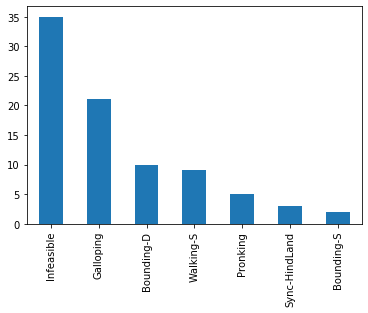

In [194]:
# Statistics of dataset
class_counts = dataset["Gait"].value_counts()
ax = class_counts.plot(kind="bar")
print(class_counts)

In [195]:
y = dataset["GaitNumber"]
X = dataset
del X["Gait"]
del X["GaitNumber"]
#    Convert to Numpy array
X = X.to_numpy()
y = y.to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
X_train = X
y_train = y

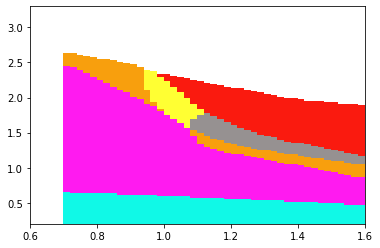

In [196]:
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

# Define color maps
#             Walking-D  Walking-S  Trotting  Galloping Bounding-S Bounding-D Pronking Sync-Front Sync-HindInfeasible 
cmap_light = ['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#FFFF33','#fa1a0f','#f89f0d','#1323b7','#969191','#FFFFFF']
cmap_bold =  ['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#FFFF33','#fa1a0f','#f89f0d','#1323b7','#969191','#FFFFFF']

#             Walking-D  Walking-S Galloping Bounding-S Bounding-D Pronking Sync-Front Sync-HindInfeasible 
#cmap_light = ['#14eb0f', '#10f9e7','#ff1af0','#FFFF33','#fa1a0f','#f89f0d','#1323b7','#969191','#FFFFFF']
#cmap_bold =  ['#14eb0f', '#10f9e7','#ff1af0','#FFFF33','#fa1a0f','#f89f0d','#1323b7','#969191','#FFFFFF']


GaitNames = [ 'Walking-D', 'Walking-S','Trotting', 'Galloping', 'Bounding-S', 'Bounding-D', 'Pronking', 'Sync-Front', 'Sync-Hind','Infeasible']
#GaitNames = [ 'Walking-D', 'Walking-S', 'Galloping', 'Bounding-S', 'Bounding-D', 'Pronking', 'Sync-Front', 'Sync-Hind','Infeasible']


for weights in weight_list:
#for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,90,90), random_state=1)
    
    clf.fit(X_train, y_train)
    
    #print(clf.score(X_test, y_test))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Get unique labels, !BE CAREFUL of INDEXING!
    result_unique_labels = np.unique(Z) #unique labels for classification result
    color_mesh_temp = cmap_light[np.min(result_unique_labels)-1:np.max(result_unique_labels)] #build color map for classification result
    sample_unique_labels = np.unique(y) #unique labels for training data
    color_sample_temp = cmap_bold[np.min(sample_unique_labels)-1:np.max(sample_unique_labels)] #
    color_mesh_temp = ListedColormap(color_mesh_temp)
    color_sample_temp = ListedColormap(color_sample_temp)
    
    # Build gait name list, !BE CAREFUL of INDEXING!
    result_gait_names = GaitNames[np.min(result_unique_labels)-2:np.max(result_unique_labels)] #gait name list for classification results
    sample_gait_names = GaitNames[np.min(sample_unique_labels)-2:np.max(sample_unique_labels)] #gait name list for traininig samples
    
    
    # Plot Figures
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=color_mesh_temp)
    #cb = plt.colorbar()
    #loc = np.arange(0,np.max(result_unique_labels)) + 1
    #cb.set_ticks(loc)
    #cb.set_ticklabels(result_gait_names)
    plt.xlim([0.6, 1.6])
    plt.ylim([0.2, 3.3])
    plt.savefig("test.svg")
    
    # Plot also the training points
#    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_sample_temp,
#                edgecolor='k', s=50)
#    plt.xlim(xx.min(), xx.max())
#    plt.ylim(yy.min(), yy.max())
#    plt.title("3-Class classification (k = %i, weights = '%s')"
#              % (n_neighbors, weights))
#    cb = plt.colorbar()
#    loc = np.arange(0,np.max(sample_unique_labels)) + 1
#    cb.set_ticks(loc)
#    cb.set_ticklabels(sample_gait_names)
#    plt.xlim([0.3, 1.7])
#    plt.ylim([0.2, 3.7])
plt.show()



#clf.predict_proba(x)

In [197]:
result_unique_labels


array([ 2,  4,  5,  6,  7,  9, 10])

In [198]:
# Predict

#  Load Test Set Task Samples and predict
testSamples = pd.read_csv(TestSetSamplePath) 
testSamples = testSamples.to_numpy()
testSampleGaitNumber = clf.predict(testSamples)
testSampleGaitNumber_test = clf.predict_proba(testSamples)
testSampleGaitLabels = []
for gaitNumberTemp in testSampleGaitNumber:
    testSampleGaitLabels.append(GaitNames[gaitNumberTemp-1])

print(testSampleGaitLabels)
print(testSampleGaitNumber_test)

['Galloping', 'Galloping', 'Walking-S', 'Galloping', 'Walking-S', 'Walking-S', 'Galloping', 'Bounding-D', 'Bounding-D', 'Bounding-D', 'Walking-S', 'Walking-S', 'Walking-S']
[[0.00000000e+000 1.00000000e+000 5.84753351e-073 2.46988871e-167
  7.10809596e-039 3.08358202e-082 0.00000000e+000]
 [2.11375268e-283 1.00000000e+000 2.96333094e-148 2.16236544e-261
  2.24821593e-065 9.79951028e-153 0.00000000e+000]
 [1.00000000e+000 3.19169188e-107 0.00000000e+000 0.00000000e+000
  5.15830884e-266 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 1.76404197e-081 4.98550895e-167
  1.19752444e-033 1.55106705e-085 0.00000000e+000]
 [1.00000000e+000 1.19658218e-094 0.00000000e+000 0.00000000e+000
  9.51540983e-248 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 7.83769928e-079 0.00000000e+000 0.00000000e+000
  2.68429918e-225 0.00000000e+000 0.00000000e+000]
 [5.00776857e-236 1.00000000e+000 6.54012721e-126 8.42445144e-212
  1.34404328e-028 2.22859270e-122 0.00000000e+000]
 [0.0000

In [199]:
prediction_result = []
for i in range(0,len(testSampleGaitNumber)):
    prediction_result.append({"StridePeriod": testSamples[i,0], "Speed": testSamples[i,1], "GaitNumber": testSampleGaitNumber[i], "Gait": testSampleGaitLabels[i]})

import csv
with open(PredictionResultPath, 'w') as csvFile:
    fields = ['StridePeriod', 'Speed', 'GaitNumber', 'Gait']
    writer = csv.DictWriter(csvFile, fieldnames=fields)
    writer.writeheader()
    writer.writerows(prediction_result)